## Load and Explore Global Streetscapes data

This notebook explores a subset of the [global streetscapes](https://ual.sg/project/global-streetscapes/) dataset saved in parquet format. How to plot and use the data was derived from the [notebooks](https://github.com/ualsg/global-streetscapes/blob/main/notebooks/visualise_dataset.ipynb) provided by the [Urban Analytics Lab (UAL)](https://ual.sg/).

### Load Parquet dataset

In [37]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import osmnx as ox

In [38]:
df = pd.read_parquet(
    "../streetscapes-data/streetscapes-data.parquet"
)

### Subset dataset

First, let's subset to a city of interest, in this case Amsterdam, but this workflow can be used for any city in the dataset. Then, create a geodataframe. 

In [39]:
city = df[df["city"] == "Amsterdam"]

city_pts = gp.GeoDataFrame(
    city, geometry=gp.points_from_xy(city.lon, city.lat), crs="EPSG:4326"
)

We can now subset the data further for images that were taken during the day and that have a viewing direction from the side.

In [40]:
city_day = city_pts[city_pts["lighting_condition"] == "day"]
city_side = city_day[city_day["view_direction"] == "side"]

We can take this further and calculate the fraction of pixels of each image that contain a certain object of interest. In this example at least 25% building or wall. 

In [41]:
city_day['building_fraction'] = city_day.apply(lambda x: x['Building']/x['Total'], axis=1)
city_day['wall_fraction'] = city_day.apply(lambda x: x['Wall']/x['Total'], axis=1)
city_walls = city_day[(city_day["wall_fraction"] > 0.25) | (city_day["building_fraction"] > 0.25)]
city_walls.head(5)

/Users/clairedonnelly/Documents/Urban-M4/streetscapes/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/clairedonnelly/Documents/Urban-M4/streetscapes/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,uuid,source,orig_id,city,city_ascii,city_id,city_lat,city_lon,country,iso2,...,heading,projection_type,hFoV,vFoV,sequence_index,sequence_id,sequence_img_count,geometry,building_fraction,wall_fraction
1905882,642298a7-563e-4650-b308-5e4371238b84,Mapillary,300520878202732,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,NL,...,128.51995,perspective,93.220881,76.856428,62,wPdUPc8tjTjCQT2_vCPd6g,170,POINT (4.89008 52.36704),0.413743,0.0
1905889,87e77845-fe9c-4f16-882a-322274a26898,Mapillary,121662616604750,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,NL,...,237.65595,perspective,55.521012,43.085209,101,Vn1lqwoPFFoGWe6EyZrBaQ,90,POINT (4.88288 52.37244),0.541447,0.0
1905891,5df67923-2acd-42bb-b431-940e60dd0e15,Mapillary,773988880153982,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,NL,...,0.00000,equirectangular,NaN,NaN,387,xxkv8r6bxnjx0w5lqfpsmb,247,POINT (4.88328 52.37383),0.319528,0.0
1905894,b653caea-99f1-4b4c-81c9-db5f2dfe6ff0,Mapillary,836793050253184,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,NL,...,0.00000,equirectangular,NaN,NaN,59,i2c2Hf5AnCm3Xh8mTsNLlg,84,POINT (4.89758 52.36824),0.389042,0.0
1905896,ec751a64-e3d1-4cf9-a812-6fcd1855722e,Mapillary,455418215520159,Amsterdam,Amsterdam,1528355309,52.3667,4.8833,Netherlands,NL,...,0.00000,equirectangular,NaN,NaN,18,1eIjUF-aNBBMmdkC-9G_fA,158,POINT (4.89585 52.37165),0.305583,0.0


### Create plot

Now that we have subset the data, we can create a plot to visualise where these images are. 

In [42]:
# Create bounding box and background for figure
G = ox.graph_from_bbox(city_pts.total_bounds[3], city_pts.total_bounds[1], city_pts.total_bounds[2], city_pts.total_bounds[0], network_type='all_private', simplify=True, retain_all=True, truncate_by_edge=False)
G2 = ox.get_undirected(G)
df_G = ox.graph_to_gdfs(G2)
df_lines = df_G[1].copy()
df_lines_proj = ox.project_gdf(df_lines).reset_index().reset_index()

/var/folders/6t/yn2bzknj4md_3s6cr6vl8h8c0000gn/T/ipykernel_46370/3109012011.py:2: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(amsterdam_pts.total_bounds[3], amsterdam_pts.total_bounds[1], amsterdam_pts.total_bounds[2], amsterdam_pts.total_bounds[0], network_type='all_private', simplify=True, retain_all=True, truncate_by_edge=False)
/var/folders/6t/yn2bzknj4md_3s6cr6vl8h8c0000gn/T/ipykernel_46370/3109012011.py:2: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(amsterdam_pts.total_bounds[3], amsterdam_pts.total_bounds[1], amsterdam_pts.total_bounds[2], amsterdam_pts.total_bounds[0], network_type='all_private', simplify=True, retain_all=True, truncate_by_edge=False)
/Users

In [43]:
# Get points for all dataframes for plotting
all_pts = ox.project_gdf(city_pts)
side_pts = ox.project_gdf(city_side)
wall_pts = ox.project_gdf(city_walls)

<Axes: >

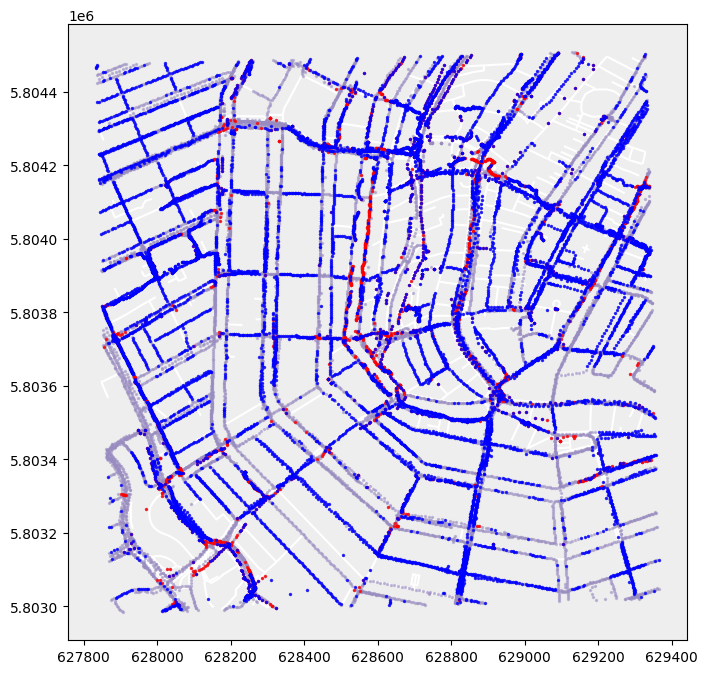

In [44]:
# create figure
fig, ax = plt.subplots(figsize=(8,8))
ax.set_facecolor('#EEEEEE')

# plot place area on Axis ax
df_lines_proj.plot(ax=ax, color='white', zorder=5)

# plot all points
all_pts.plot(ax=ax, marker='o', color='#998cc0', markersize=2, alpha=0.5, zorder=10)

# plot side view points
side_pts.plot(ax=ax, marker='o', color='red', markersize=2, alpha=0.7, zorder=15)

# plot points with walls and buildings
wall_pts.plot(ax=ax, marker='o', color='blue', markersize=2, alpha=0.7, zorder=15)